In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image,ImageChops

In [9]:
train = pd.read_csv('/Users/kaivuxu/Downloads/mnist_train.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
rownum=6875

In [11]:
if rownum > -1 and rownum < 60000:
    pixels = train.iloc[rownum][1:].values.reshape(28,28)
    array = np.array(pixels,dtype=np.uint8)
    img = Image.fromarray(array)
else:
    print('wrong')

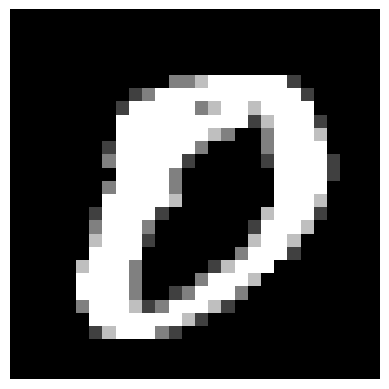

In [12]:
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [13]:
gray_img = img.convert('L')

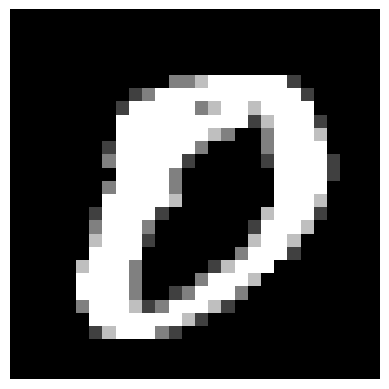

In [14]:
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

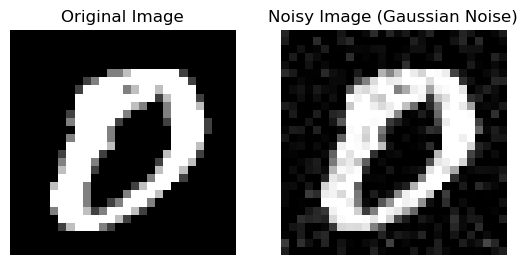

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=25):
    """ Add Gaussian noise to the image """
    image_array = np.array(image)
    noise = np.random.normal(mean, sigma, image_array.shape)  # Generate Gaussian noise
    noisy_image = image_array + noise  # Add the noise to the original image
    
    # Clip the values to keep them in the valid range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)
    return Image.fromarray(noisy_image.astype(np.uint8))



# Add Gaussian noise to the image
noisy_img = add_gaussian_noise(gray_img)

# Display the original and noisy images
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image (Gaussian Noise)")
plt.axis('off')

plt.show()


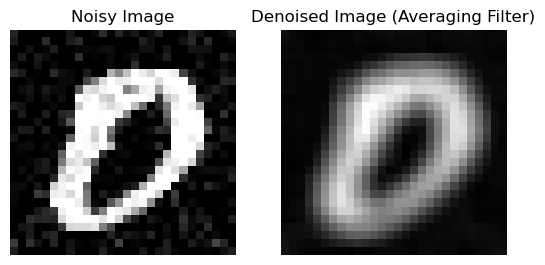

In [17]:
from PIL import ImageFilter

# Apply an averaging filter to remove noise
def remove_noise_averaging(noisy_image):
    # Applying an averaging filter (simple blur filter)
    return noisy_image.filter(ImageFilter.BoxBlur(2))  # 2 is the radius of the blur

# Remove the Gaussian noise using the averaging filter
denoised_img = remove_noise_averaging(noisy_img)

# Display the denoised image
plt.subplot(1, 2, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title("Denoised Image (Averaging Filter)")
plt.axis('off')

plt.show()


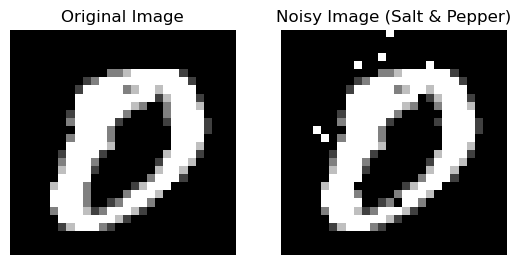

In [18]:
def add_salt_and_pepper_noise(image, amount=0.02):
    """ Add Salt and Pepper noise to the image """
    image_array = np.array(image)
    total_pixels = image_array.size
    num_salt = int(total_pixels * amount * 0.5)  # Number of salt pixels
    num_pepper = int(total_pixels * amount * 0.5)  # Number of pepper pixels

    # Add salt noise (white pixels)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image_array.shape]
    image_array[salt_coords[0], salt_coords[1]] = 255

    # Add pepper noise (black pixels)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image_array.shape]
    image_array[pepper_coords[0], pepper_coords[1]] = 0

    return Image.fromarray(image_array)

# Add Salt & Pepper noise to the image
noisy_sp_img = add_salt_and_pepper_noise(gray_img)

# Display the original and noisy images
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_sp_img, cmap='gray')
plt.title("Noisy Image (Salt & Pepper)")
plt.axis('off')

plt.show()


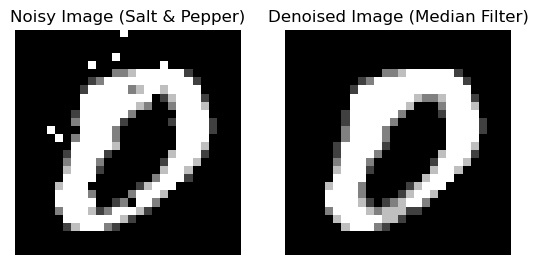

In [19]:
from PIL import ImageFilter

# Apply a median filter to remove salt & pepper noise
def remove_noise_median(noisy_image):
    # Applying a median filter to remove noise
    return noisy_image.filter(ImageFilter.MedianFilter(size=3))  # Size determines the filter's window

# Remove the Salt & Pepper noise using the median filter
denoised_sp_img = remove_noise_median(noisy_sp_img)

# Display the denoised image
plt.subplot(1, 2, 1)
plt.imshow(noisy_sp_img, cmap='gray')
plt.title("Noisy Image (Salt & Pepper)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_sp_img, cmap='gray')
plt.title("Denoised Image (Median Filter)")
plt.axis('off')

plt.show()
